In [29]:
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np

In [30]:
alpaca_api_key = "PKJYB527YAQVS4J907RJ"
alpaca_secret_key = "zb5bvTpu8cWaKIgAbDCESouV9MX0qn4RXiQzS5n8"

In [31]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [32]:
# Set ticker
tickers = ["JPM"]

In [33]:
# Set timeframe
timeframe = "1Day"

In [34]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2014-02-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-02-07", tz="America/New_York").isoformat()

In [35]:
# Get closing prices for stock from the last year
df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

def signal_creator_5(row):
    percent_diff = (row['close'] - row['shifted_close_5']) / row['shifted_close_5']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0
    
def signal_creator_15(row):
    percent_diff = (row['close'] - row['shifted_close_15']) / row['shifted_close_15']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

def signal_creator_30(row):
    percent_diff = (row['close'] - row['shifted_close_30']) / row['shifted_close_30']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

df = df.drop(columns=['symbol'])

# 5 day shift
df['shifted_close_5'] = df['close'].shift(periods=5)
df['signal_5'] = 0
print(df)
df['signal_5'] = df.apply(signal_creator_5, axis=1)

# 15 day shift
df['shifted_close_15'] = df['close'].shift(periods=15)
df['signal_15'] = 0
print(df)
df['signal_15'] = df.apply(signal_creator_15, axis=1)

# 30 day shift
df['shifted_close_30'] = df['close'].shift(periods=30)
df['signal_30'] = 0
df['signal_30'] = df.apply(signal_creator_30, axis=1)

# Columns and NA drops to prevent data leakege
df.dropna(inplace=True)
df.drop(columns=['shifted_close_5','shifted_close_15','shifted_close_30'],inplace=True)

# Display sample data
df.tail(10)



                            close     high     low  trade_count    open  \
timestamp                                                                 
2016-01-04 05:00:00+00:00   63.62   64.060   63.01       145804   63.95   
2016-01-05 05:00:00+00:00   63.73   64.130   63.04       103027   63.69   
2016-01-06 05:00:00+00:00   62.81   63.125   62.34       124497   62.70   
2016-01-07 05:00:00+00:00   60.27   62.000   60.08       166584   61.46   
2016-01-08 05:00:00+00:00   58.92   61.270   58.85       135242   61.13   
...                           ...      ...     ...          ...     ...   
2020-02-03 05:00:00+00:00  133.37  134.240  132.66        80373  132.66   
2020-02-04 05:00:00+00:00  135.29  136.600  135.08        75520  135.55   
2020-02-05 05:00:00+00:00  137.59  137.730  136.01        95892  136.57   
2020-02-06 05:00:00+00:00  137.61  138.290  137.11        73748  138.24   
2020-02-07 05:00:00+00:00  137.17  137.670  136.30        65454  136.70   

                        

,close,high,low,trade_count,open,volume,vwap,signal_5,signal_15,signal_30
timestamp,,,,,,,,,,
2020-01-27 05:00:00+00:00,132.03,132.94,129.7100,101136,130.27,14046802,131.945172,-1,-1,0
2020-01-28 05:00:00+00:00,134.43,134.97,132.4784,84904,132.84,14520565,134.380176,0,0,0
2020-01-29 05:00:00+00:00,134.23,135.54,133.6900,69451,134.81,10548966,134.649209,0,0,0
2020-01-30 05:00:00+00:00,135.89,136.13,132.6900,65716,132.69,10352609,134.954350,0,0,0
2020-01-31 05:00:00+00:00,132.36,134.83,131.4700,91015,134.49,15048173,132.723609,0,-1,-1
2020-02-03 05:00:00+00:00,133.37,134.24,132.6600,80373,132.66,11234246,133.530030,0,0,-1
2020-02-04 05:00:00+00:00,135.29,136.60,135.0800,75520,135.55,10335894,135.795157,0,0,0
2020-02-05 05:00:00+00:00,137.59,137.73,136.0100,95892,136.57,11026261,137.043916,0,0,0
2020-02-06 05:00:00+00:00,137.61,138.29,137.1100,73748,138.24,10446788,137.644773,0,0,0


In [36]:
# Use adjusted close prices to predict future

df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

data = df['close'].values.reshape(-1, 1)

In [37]:
# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [38]:
def prepare_data(data, n_steps, n_days):
    X, y = [], []
    for i in range(len(data) - n_steps - n_days):
        X.append(data[i : i + n_steps, 0])
        y.append(data[i + n_steps : i + n_steps + n_days, 0])
    return np.array(X), np.array(y)

# Update for 5 days model
n_steps_5 = 5
n_days_5 = 5  

# Define and compile the model for 5 day prediction
model_5 = Sequential()
model_5.add(LSTM(units=50, activation='relu', input_shape=(n_steps_5, 1)))
model_5.add(Dense(units=n_days_5))
model_5.compile(optimizer='adam', loss='mse')

# Prepare the data for 5 day prediction
X_5, y_5 = prepare_data(data_scaled, n_steps_5, n_days_5)
X_5 = X_5.reshape((X_5.shape[0], X_5.shape[1], 1))

# Fit the model for 5-day prediction
model_5.fit(X_5, y_5, epochs=50, verbose=1)

# Update for 10 days model
n_steps_10 = 10
n_days_10 = 10 

# Define and compile the model for 10 day prediction
model_10 = Sequential()
model_10.add(LSTM(units=50, activation='relu', input_shape=(n_steps_10, 1)))
model_10.add(Dense(units=n_days_10))
model_10.compile(optimizer='adam', loss='mse')

# Prepare the data for 10 day prediction
X_10, y_10 = prepare_data(data_scaled, n_steps_10, n_days_10)
X_10 = X_10.reshape((X_10.shape[0], X_10.shape[1], 1))

# Fit the model for 10 day prediction
model_10.fit(X_10, y_10, epochs=50, verbose=1)

# Update for 30 days model
n_steps_30 = 30
n_days_30 = 30 

# Define and compile the model for 30 day prediction
model_30 = Sequential()
model_30.add(LSTM(units=50, activation='relu', input_shape=(n_steps_30, 1)))
model_30.add(Dense(units=n_days_30))
model_30.compile(optimizer='adam', loss='mse')

# Prepare the data for 30 day prediction
X_30, y_30 = prepare_data(data_scaled, n_steps_30, n_days_30)
X_30 = X_30.reshape((X_30.shape[0], X_30.shape[1], 1))

# Fit the model for 30 day prediction
model_30.fit(X_30, y_30, epochs=50, verbose=1)



Epoch 1/50
32/32 [==============================] - 1s 3ms/step - loss: 0.8802
Epoch 2/50
32/32 [==============================] - 0s 3ms/step - loss: 0.4538
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0856
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 6/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0155
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0150
Epoch 11/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 12/50
32/32 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 13/50
32/32 [==============================

In [39]:
# Prepare and reshape data

# Define parameters for each model
n_steps_5 = 5
n_days_5 = 5

n_steps_10 = 10
n_days_10 = 10

n_steps_30 = 30
n_days_30 = 30

# Prepare and reshape data for 5 day model
X_test_5, _ = prepare_data(data_scaled, n_steps_5, n_days_5)
X_test_5 = X_test_5.reshape((X_test_5.shape[0], X_test_5.shape[1], 1))

# Prepare and reshape data for 10 day model
X_test_10, _ = prepare_data(data_scaled, n_steps_10, n_days_10)
X_test_10 = X_test_10.reshape((X_test_10.shape[0], X_test_10.shape[1], 1))

# Prepare and reshape data for 30 day model
X_test_30, _ = prepare_data(data_scaled, n_steps_30, n_days_30)
X_test_30 = X_test_30.reshape((X_test_30.shape[0], X_test_30.shape[1], 1))

# Generate predictions
predictions_5 = model_5.predict(X_test_5)
predictions_10 = model_10.predict(X_test_10)
predictions_30 = model_30.predict(X_test_30)

# Inverse transform the scaled predictions for stock prices
predictions_5 = scaler.inverse_transform(predictions_5)
predictions_10 = scaler.inverse_transform(predictions_10)
predictions_30 = scaler.inverse_transform(predictions_30)

31/31 [==============================] - 0s 3ms/step


Predicted Prices for the Next 5 Days:
[[ 60.906258  61.573242  61.871376  61.116386  61.04059 ]
 [ 60.02363   60.640327  60.928814  60.12372   60.25477 ]
 [ 59.126266  59.531536  59.829777  59.198383  59.498276]
 ...
 [134.20775  134.0856   134.33948  134.70496  135.25966 ]
 [134.41718  134.5457   134.8748   135.34622  135.5855  ]
 [134.9333   135.2123   135.62006  136.47336  136.38205 ]]


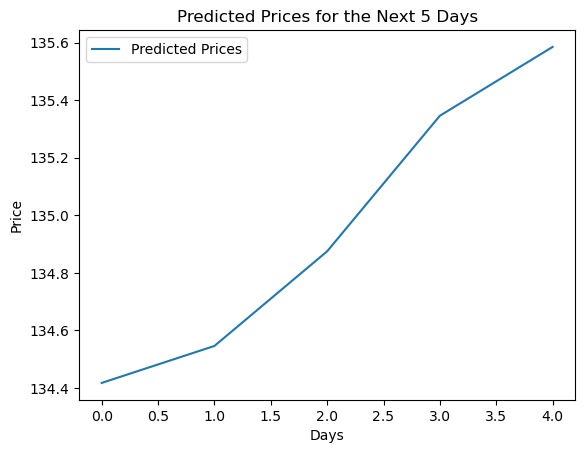

In [40]:
# Set title and data
print("Predicted Prices for the Next 5 Days:")
print(predictions_5)

# Plot
plt.plot(predictions_5[1020], label="Predicted Prices")
plt.title("Predicted Prices for the Next 5 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Predicted Prices for the Next 10 Days:
[[ 59.193012  60.14471   60.370346 ...  59.667095  60.170025  60.713894]
 [ 58.685047  59.570587  59.716423 ...  59.237053  59.566902  60.09677 ]
 [ 57.816967  58.70628   58.84591  ...  58.383595  58.613567  59.269913]
 ...
 [137.75616  137.45757  137.18452  ... 138.28181  137.99852  138.30887 ]
 [137.37027  136.9679   136.81625  ... 137.82617  137.68156  137.95515 ]
 [136.96515  136.59454  136.33255  ... 137.31284  137.3454   137.5     ]]


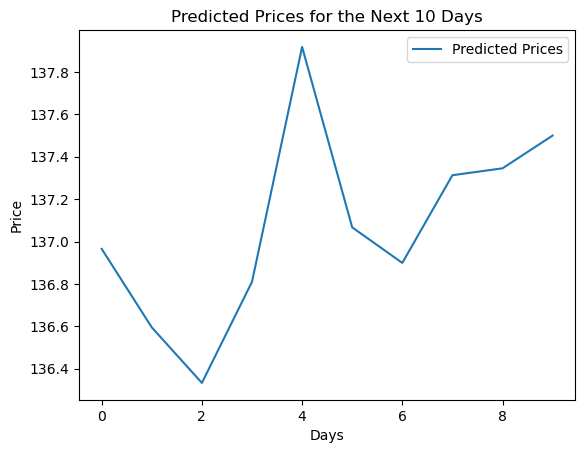

In [41]:
# Set title and data
print("Predicted Prices for the Next 10 Days:")
print(predictions_10)

# Plot
plt.plot(predictions_10[1011], label="Predicted Prices")
plt.title("Predicted Prices for the Next 10 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


Predicted Prices for the Next 30 Days:
[[ 57.449203  57.568687  57.976303 ...  58.524734  58.429333  58.039272]
 [ 57.837116  58.211838  58.67132  ...  58.92117   58.66933   58.560688]
 [ 58.166622  58.674103  59.158916 ...  59.17916   58.87696   58.954956]
 ...
 [135.87631  139.98357  136.62027  ... 142.22934  141.58807  145.03104 ]
 [134.25957  139.29584  135.32764  ... 141.41245  140.7433   144.49838 ]
 [132.61739  138.47673  133.95953  ... 140.61472  139.89693  143.85489 ]]


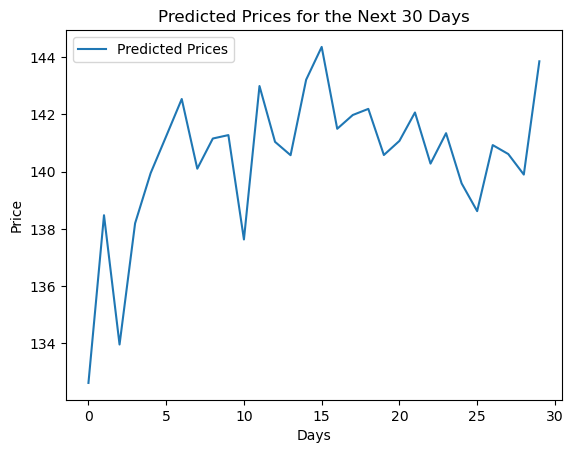

In [42]:
# Set title and data
print("Predicted Prices for the Next 30 Days:")
print(predictions_30)

# Plot
plt.plot(predictions_30[971], label="Predicted Prices")
plt.title("Predicted Prices for the Next 30 Days")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()
